<a href="https://colab.research.google.com/github/anturex2016/Computetional_intelligence_course/blob/main/Stock_data_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**installing chart_studio**

In [2]:
! pip install chart_studio

     |████████████████████████████████| 71kB 4.9MB/s 


In [1]:
! git clone https://github.com/anturex2016/Computetional_intelligence_course

Cloning into 'Computetional_intelligence_course'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 8), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


**Input library**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv('Computetional_intelligence_course/TSLA.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,5.368,5.400,5.180,5.324,5.324,6415000
1,2011-01-04,5.332,5.390,5.204,5.334,5.334,5937000
2,2011-01-05,5.296,5.380,5.238,5.366,5.366,7233500
3,2011-01-06,5.366,5.600,5.362,5.576,5.576,10306000
4,2011-01-07,5.600,5.716,5.580,5.648,5.648,11239500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2555 non-null   object 
 1   Open       2555 non-null   float64
 2   High       2555 non-null   float64
 3   Low        2555 non-null   float64
 4   Close      2555 non-null   float64
 5   Adj Close  2555 non-null   float64
 6   Volume     2555 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 139.9+ KB


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
print(f'Stock price date between {df.Date.min()} to {df.Date.max()}')
print(f'Total days ={(df.Date.max()- df.Date.min()).days} days')

Stock price date between 2011-01-03 00:00:00 to 2021-02-26 00:00:00
Total days =3707 days


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2.555000e+03
mean,74.786992,76.428478,73.047134,74.870499,74.870499,3.299649e+07
std,130.652865,133.740159,127.228990,130.900431,130.900431,2.919566e+07
min,4.356000,4.454000,4.222000,4.366000,4.366000,1.198000e+06
25%,24.295000,24.954000,23.874000,24.319001,24.319001,1.373600e+07
50%,45.734001,46.341999,44.924000,45.666000,45.666000,2.597050e+07
75%,62.567001,63.395001,61.295000,62.460001,62.460001,4.209815e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


**Figure of stock price**

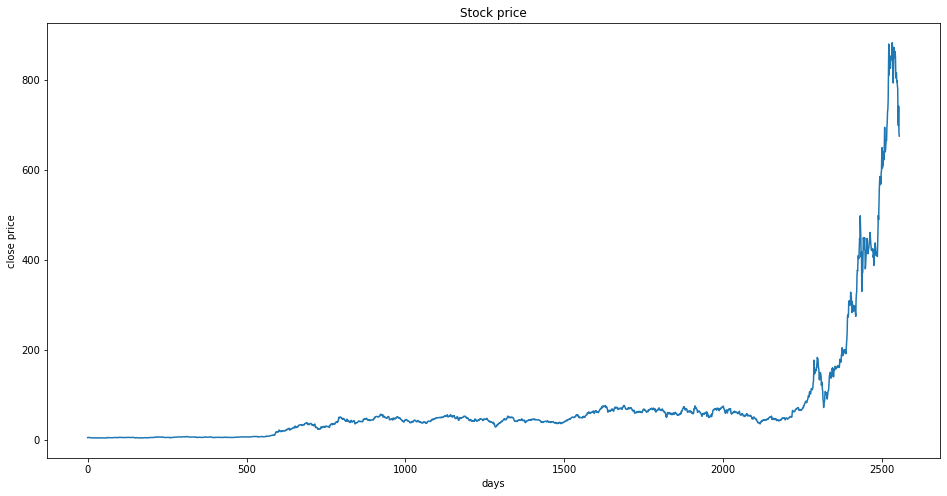

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Stock price')
plt.xlabel('days')
plt.ylabel('close price')
plt.plot(df['Close'])
plt.show()

**Training and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
x= df[['High','Open','Low','Volume']].values
y= df['Close'].values
xtrain, xtest,ytrain,ytest=train_test_split(x,y, test_size = 0.2, random_state=0)
print(f"Rows in train set:{len(xtrain)} \nRows in test set:{len(xtest)}")

Rows in train set:2044 
Rows in test set:511


**Feature Scalling**

In [ ]:
scaler=StandardScaler().fit(xtrain)

**model building**

**Linear** **Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred=model.predict(xtest)
prediction=pd.DataFrame({'original value ': ytest.flatten(),'Predicted value' : ypred.flatten()})
prediction.head()

,original value,Predicted value
0,51.950001,51.964677
1,126.846001,126.467679
2,66.737999,66.313705
3,43.549999,43.270359
4,20.298000,20.289309


In [ ]:
import math

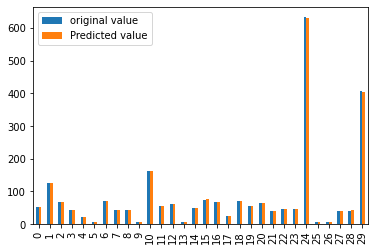

In [ ]:
graph = prediction.head(30)
graph.plot(kind='bar')

**SVM**

In [ ]:
from sklearn.svm import SVR
model= SVR()
model.fit(xtrain, ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
ypred=model.predict(xtest)
prediction=pd.DataFrame({'original value ': ytest.flatten(),'Predicted value' : ypred.flatten()})
prediction.head()

,original value,Predicted value
0,51.950001,57.291278
1,126.846001,59.052480
2,66.737999,58.419509
3,43.549999,26.193741
4,20.298000,58.365811


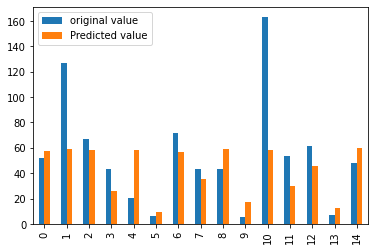

In [ ]:
graph = prediction.head(15)
graph.plot(kind='bar')

**Decision** **Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
model.fit(xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
ypred=model.predict(xtest)
prediction=pd.DataFrame({'original value ': ytest.flatten(),'Predicted value' : ypred.flatten()})
prediction.head()

,original value,Predicted value
0,51.950001,52.632000
1,126.846001,130.113998
2,66.737999,66.601997
3,43.549999,43.816002
4,20.298000,19.546000


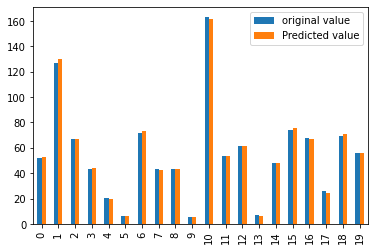

In [ ]:
graph = prediction.head(20)
graph.plot(kind='bar')

**Evaluating model**

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)

In [ ]:
rmse

4.823457576115431

In [ ]:
mse

23.265742988585348